In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
variety = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [4]:
lda.coef_

array([[  6.96632706,  12.14924052, -16.81632386, -19.57622224],
       [ -1.3445497 ,  -4.13425594,   4.06583571,   2.23331372],
       [ -5.15485732,  -7.29244075,  11.66542918,  15.95157418]])

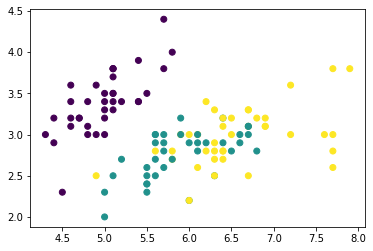

In [5]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [6]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

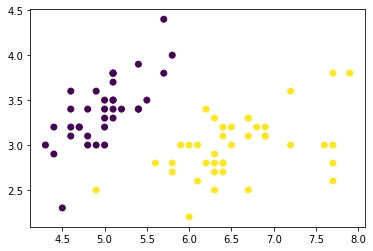

In [7]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [8]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)
lda_small.means_

array([[4.98611111, 3.39444444],
       [6.56666667, 2.97948718]])

ValueError: 'red_blue_classes' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

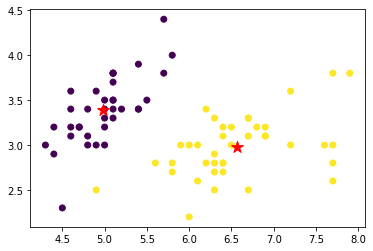

In [9]:
from matplotlib import colors
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
#по какой-то причине у меня не сработал cmap 'red_blue_classes', который был на лекции, поэтому взяла другой.

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [64]:
#Как я поняла, всё определяет ось Х, это так? По коэффицентам можно сделать вывод, что у них одинаковое влияние,
#но второй чуть сильнее влияет, а в остальном отличие только в знаке. Я правильно рассуждаю?

lda_small.coef_

array([[ 11.39161641, -11.78434852]])

In [65]:
accuracy_score(sy_test, lda_small.predict(small_test))

0.9615384615384616

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

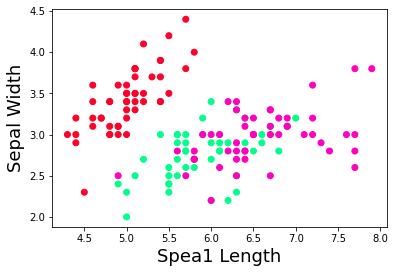

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)




Text(0.5, 1.0, 'Predicted')

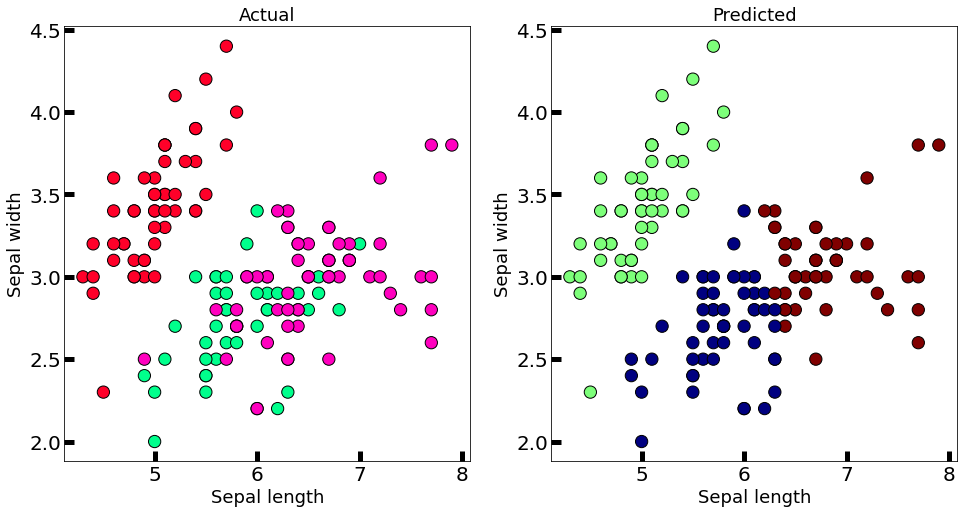

In [83]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

#Значит ли это, что прогнозная модель работает неверно, если границы кластеров не совпадают с реальной ситуацией? Как определить
#точность созданной модели, подскажите, пожалуйста?